   UF  Habitantes  Matriculados  Percentual1  Percentual2        Rateio
0  AC      880631        232806     0.264363     0.051428  1.388551e+06
1  AL     3220104        723228     0.224598     0.043692  1.179687e+06
2  AM     4281209       1025004     0.239419     0.046575  1.257537e+06
3  AP      802837        186314     0.232070     0.045146  1.218933e+06
4  BA    14850513       2817947     0.189754     0.036914  9.966736e+05
         Habitantes  Matriculados  Percentual1  Percentual2        Rateio
count  2.700000e+01  2.700000e+01    27.000000    27.000000  2.700000e+01
mean   7.873472e+06  1.354895e+06     0.190387     0.037037  1.000000e+06
std    9.256156e+06  1.416168e+06     0.033605     0.006537  1.765074e+05
min    7.167930e+05  1.620660e+05     0.132967     0.025867  6.984032e+05
25%    2.942356e+06  4.895135e+05     0.165676     0.032230  8.702049e+05
50%    4.145040e+06  7.645010e+05     0.181709     0.035349  9.544154e+05
75%    9.386342e+06  1.697256e+06     0.219876    

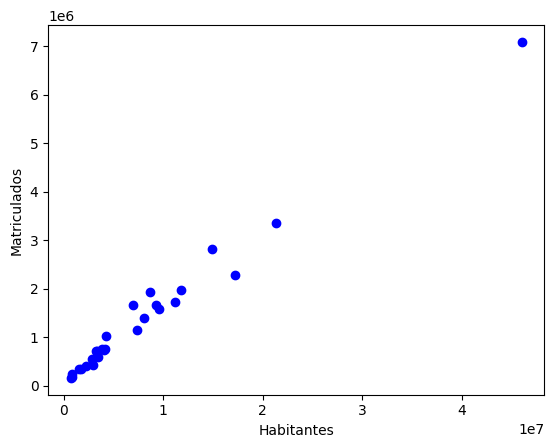

Coefficients:  [[0.1812373]]
Intercept:  [25442.48819118]


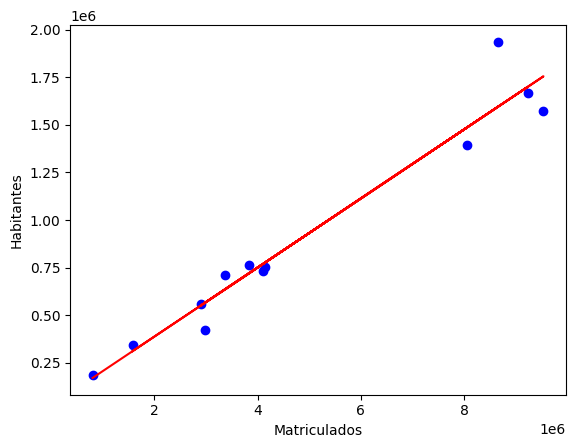

R2-score: 0.95


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

#CARREGAR OS DADOS
df = pd.read_csv('/content/Tabela_UF.csv', encoding ='latin 1', delimiter=';')

#EXIBIR A ESTRUTURA DO DATAFRAME
print (df.head())

#EXIBIR O RESUMO DO DATAFRAME
print (df.describe())

#SELECIONAR SOMENTE ALGUMAS FEATURES
cdf = df[['Habitantes','Matriculados']]
print (cdf.head(2))

plt.scatter (cdf.Habitantes, cdf.Matriculados, color='blue')
plt.xlabel ("Habitantes")
plt.ylabel ("Matriculados")
plt.show ()

#DIVIDIR OS DADOS EM DADOS DE TREINAMENTO E DADOS DE TESTE
msk = np.random.rand(len(df)) < 0.5
train = df[msk]
test = df[~msk]

#TREINAR O MODELO
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Habitantes']])
train_y = np.asanyarray(train[['Matriculados']])
regr.fit(train_x, train_y)

#EXIBIR OS COEFICIENTES
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

#EXIBIR A FIT LINE
plt.scatter(train.Habitantes, train.Matriculados, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.ylabel ("Habitantes")
plt.xlabel ("Matriculados")
plt.show()

#AVALIAR O MODELO
test_x = np.asanyarray(test[['Habitantes']])
test_y = np.asanyarray(test[['Matriculados']])
test_y_pred = regr.predict(test_x)

print ("R2-score: %.2f" % r2_score(test_y_pred , test_y) )